#

<div align=left>
<img src="https://uol.unifor.br/acesso/app/autenticacao/assets/img/logos/icon-unifor.svg" width=55 height=55>
<img src="https://e7.pngegg.com/pngimages/656/737/png-clipart-pac-man-ghost-character-pac-man-ghosts-pac-man-text-rectangle-thumbnail.png" width=55 height=55>

<br><br>
<font size=5 color='black'><strong>Cenário 01:</strong>

Projeto 01 - Pacman

<strong>Equipe:</strong> 

Heitor Teixeira 2220276

João Guilherme 

Mariana Vieira

<strong>Turma:</strong> 

T35EF

</div>

In [1]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
import networkx as nx
import matplotlib.pyplot as plt
import time

with open('grafo.json', 'r') as file:
    grafo = json.load(file)

In [2]:
def matriz_adjacencia(dicionario):
    vertices = list(dicionario.keys())
    
    matriz = pd.DataFrame(0, index=vertices, columns=vertices)
    
    for vertice, info in dicionario.items():
        for destino, peso in info['arestas'].items():
            matriz.at[vertice, destino] = peso
    
    return matriz

def matriz_incidencia(dicionario):
    vertices = list(dicionario.keys())
    arestas = []

    for vertice, info in dicionario.items():
        for destino, peso in info['arestas'].items():
            arestas.append((vertice, destino, peso))
    
    matriz = pd.DataFrame(0, index=vertices, columns=[f"a{i+1}" for i in range(len(arestas))])
    
    for i, (vertice, destino, peso) in enumerate(arestas):
        matriz.at[vertice, f"a{i+1}"] = peso  
        matriz.at[destino, f"a{i+1}"] = - peso
    
    return matriz

def plotar_grafo(dicionario):
    G = nx.DiGraph()  
    
    pos = {}
    cor = {}
    plt.figure(figsize=(7, 7)) 
    
    for vertice, info in dicionario.items():
        pos[vertice] = info['posicao']  
        cor[vertice] = info['cor'] 


        for destino, peso in info['arestas'].items():
            G.add_edge(vertice, destino)
    
    colors = [cor[vertice] for vertice in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1000, font_size=12, arrows=False)

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title('Pacman')
    plt.show()
    



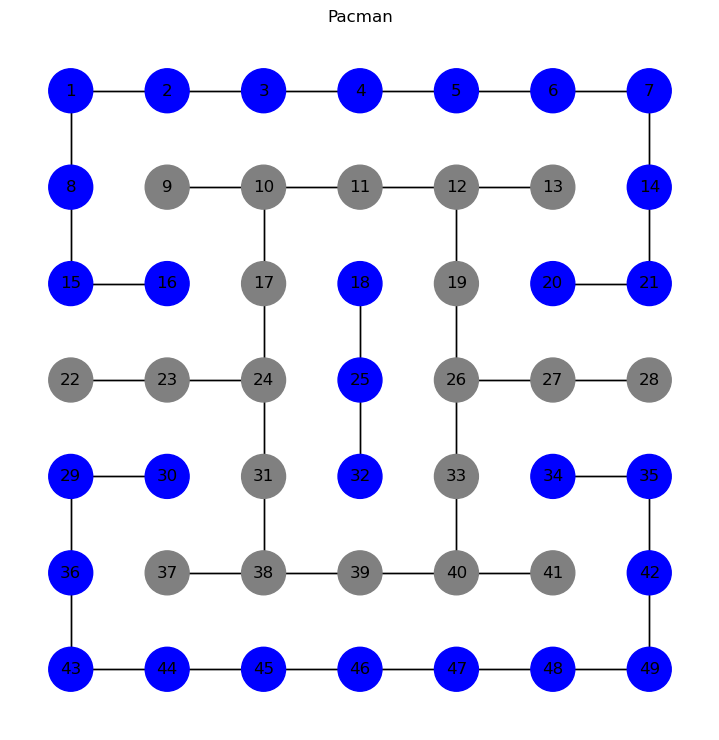

In [3]:
plotar_grafo(grafo)

In [4]:
matriz_adjacencia(grafo)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
matriz_incidencia(grafo)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50,a51,a52,a53,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63,a64,a65,a66,a67,a68,a69,a70,a71,a72,a73,a74,a75,a76,a77,a78,a79,a80,a81,a82,a83,a84,a85,a86,a87,a88,a89,a90,a91,a92
1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1,0,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,1,1,-1,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
''' 
escolher qual vai ser o vertice do pacman e do fantasma vemelho
obs. escolher apenas os vertices da cor cinza, se não vai explodir!
'''
    
fantasma = '26'
pacman = '9'

# pacman
grafo[pacman]['cor'] = 'yellow'

# fantasma vermelho
grafo[fantasma]['cor'] = 'red'

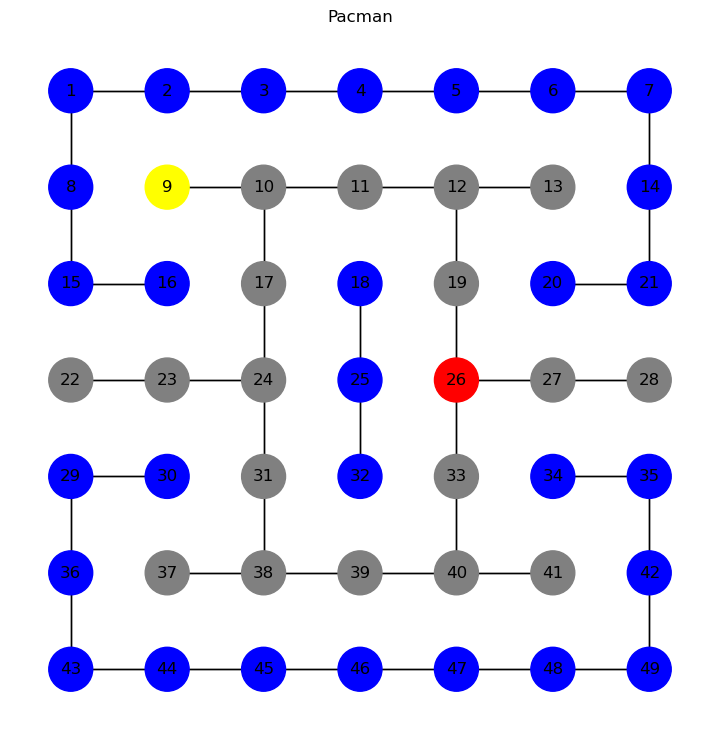

In [7]:
plotar_grafo(grafo)

In [8]:
from collections import deque

def bfs(graph, start, target):
    visited = set()
    queue = deque([(start, [start])])
    visited_order = []

    while queue:
        node, path = queue.popleft()
        if node not in visited:
            visited.add(node)
            grafo[node]['cor'] = 'green'
            time.sleep(2)
            visited_order.append(node)
            if node == target:
                return path
            for neighbor in graph[node]:
                if (grafo[neighbor]['cor'] != 'green'):
                    grafo[neighbor]['cor'] = 'orange'
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
            plotar_grafo(grafo)

    return None

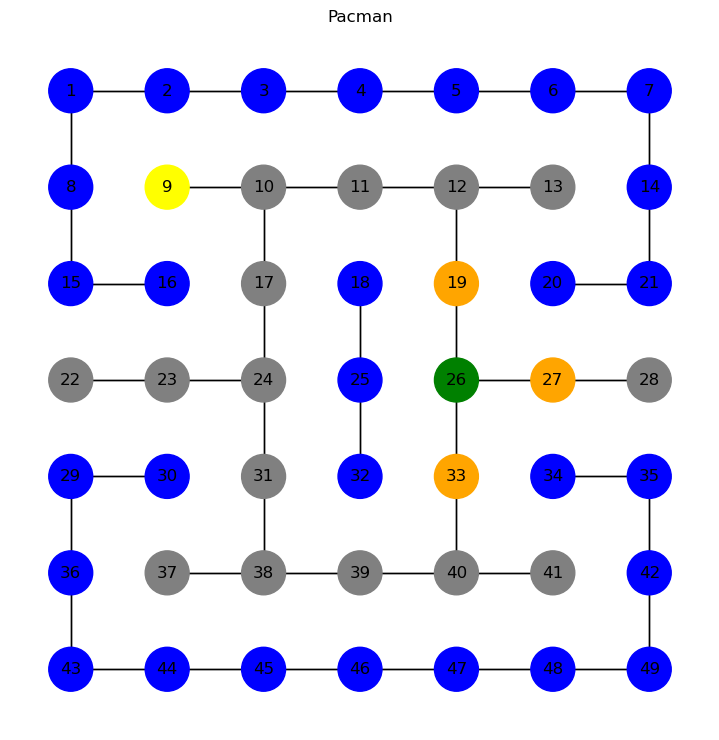

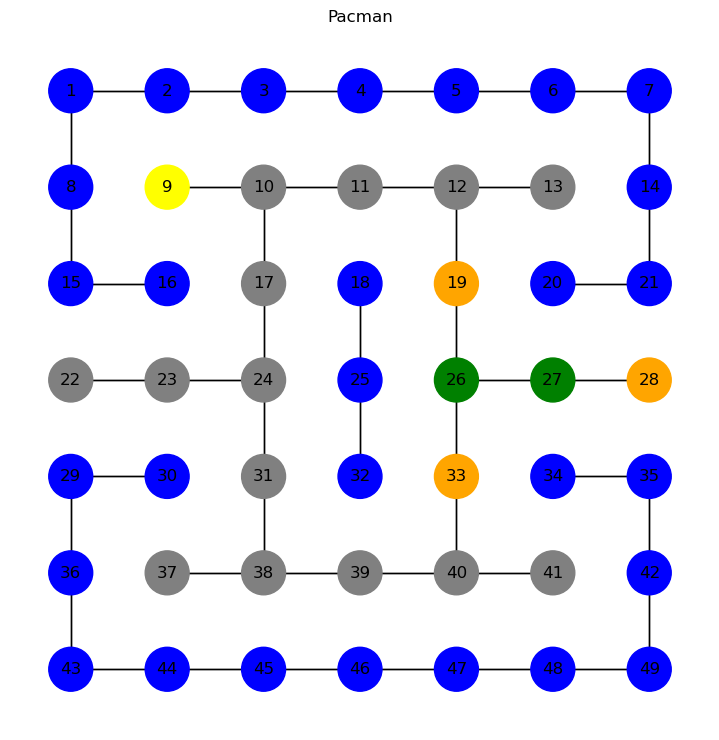

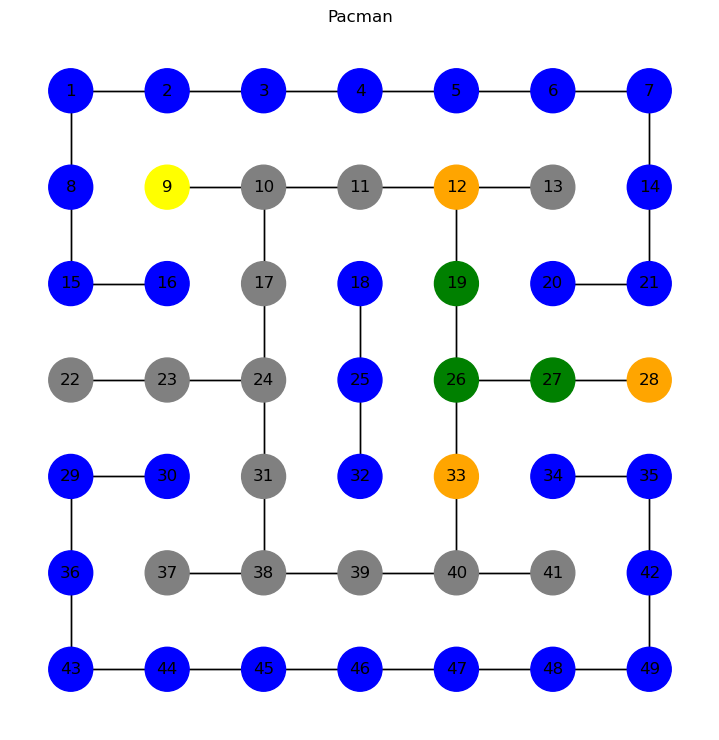

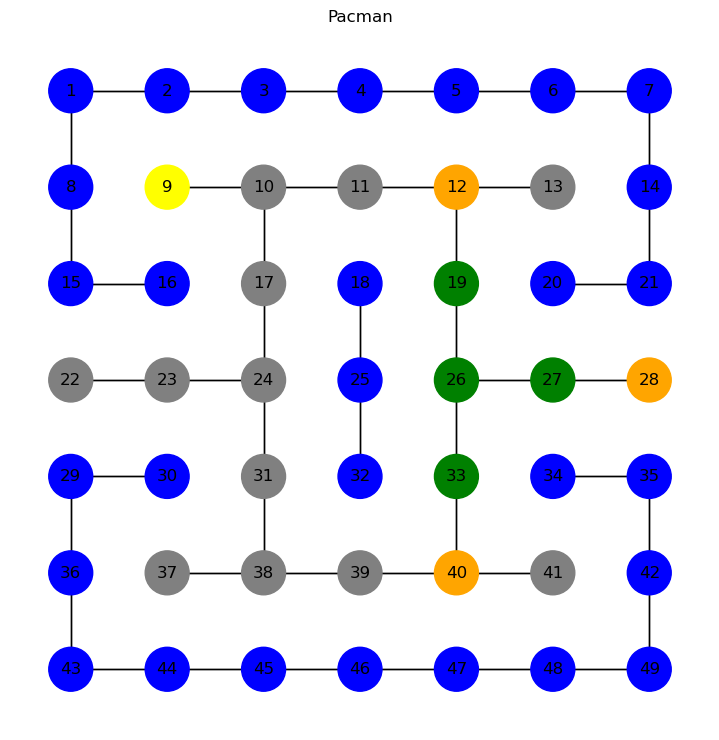

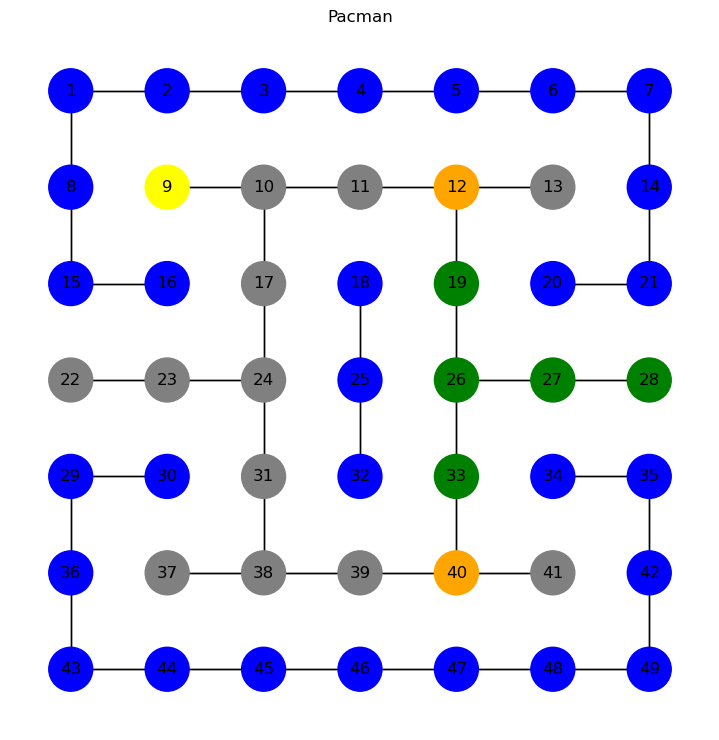

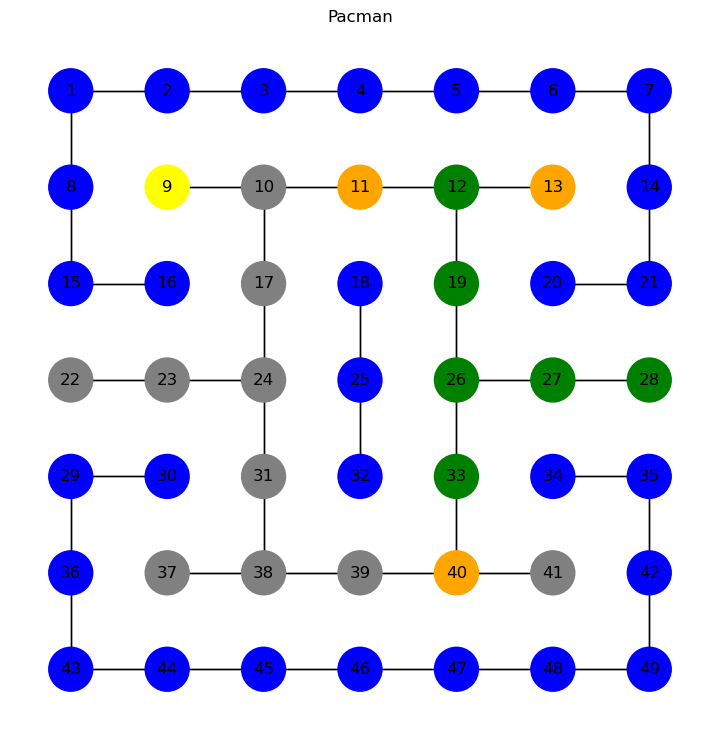

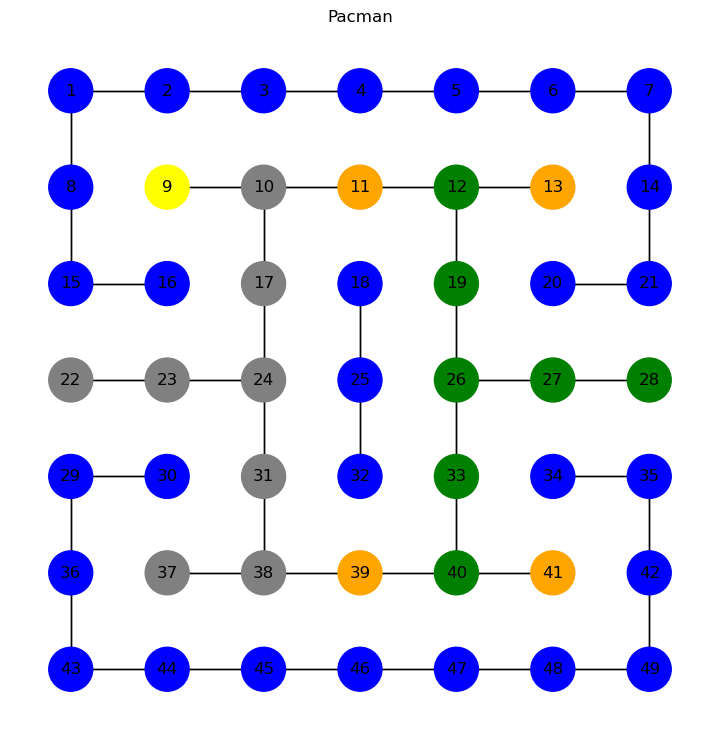

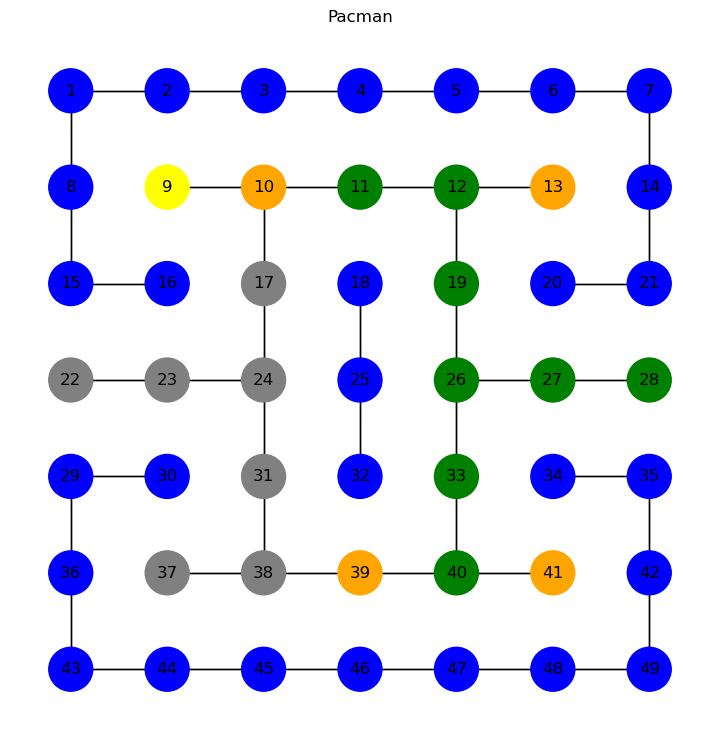

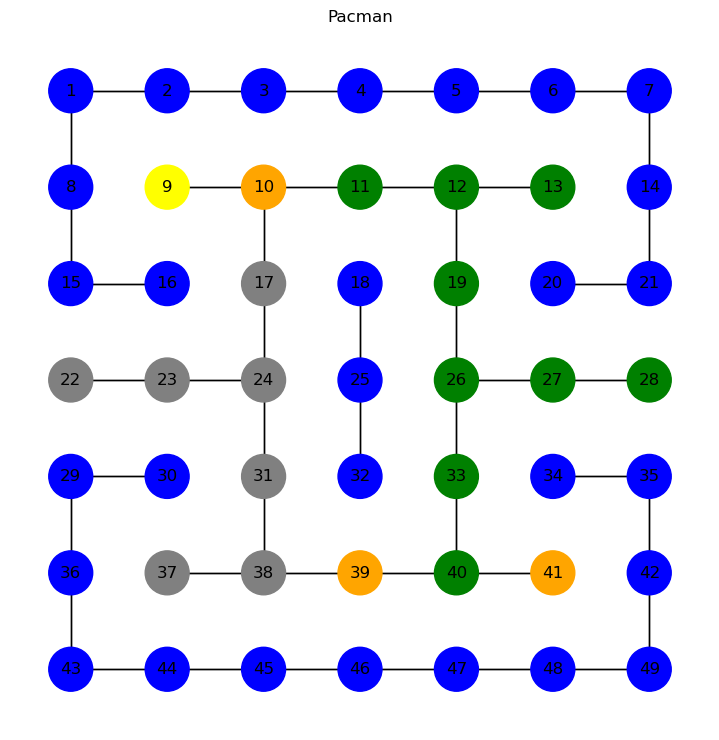

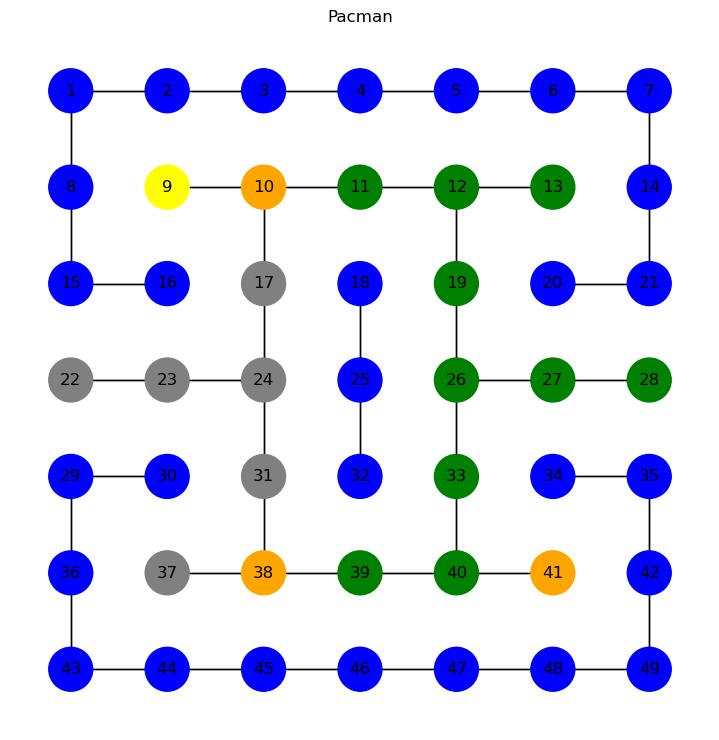

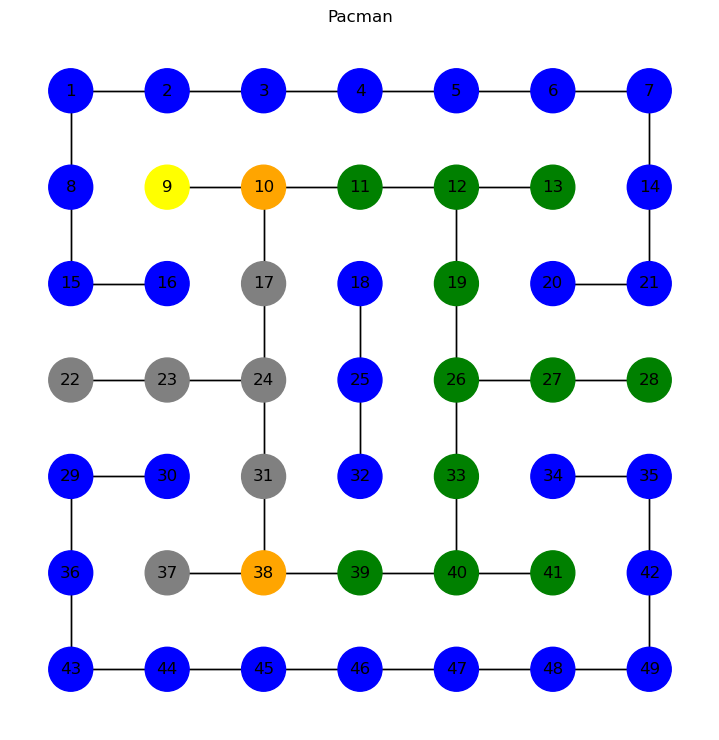

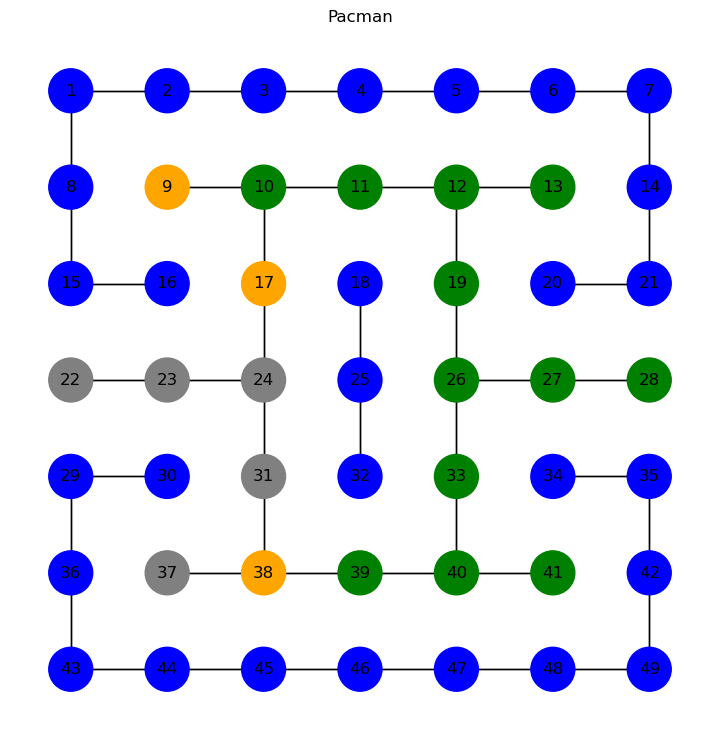

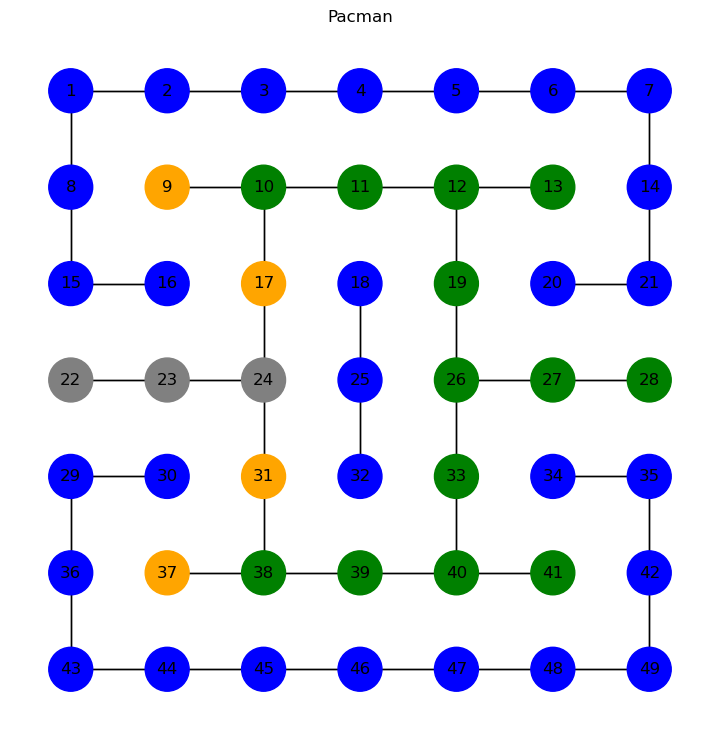

In [9]:
lista_incidencia = {}
for vertice in grafo:
    lista_incidencia[vertice] = list(grafo.get(vertice).get('arestas').keys())

path = bfs(graph=lista_incidencia, start=fantasma, target=pacman)
